# 분류용 선형 모델

- y ̂=w[0]x[0]+w[1]x[1]+⋯+w[p]x[p]+b > 0
- 결정경계가 입력의 선형함수
- 잘못된 분류의 수를 최소화 하도록 w와 b값을 조정하는 것은 수학적으로 불가능.

- example) Logistic Regression, LinearSVC
- L2 규제 사용
- C값으로 규제 강도를 결정. C값이 낮아지면 규제 증가(일반화)

C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


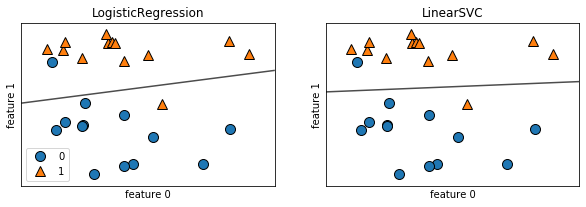

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC#(svm: support vector machine)
import matplotlib.pyplot as plt
import mglearn
import numpy as np
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LogisticRegression(), LinearSVC()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax,alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("train set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("test set score:{:.3f}".format(logreg.score(X_test,y_test)))

train set score:0.955
test set score:0.958


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [15]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("train set score:{:.3f}".format(logreg100.score(X_train,y_train)))
print("test set score:{:.3f}".format(logreg100.score(X_test,y_test)))
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("train set score:{:.3f}".format(logreg001.score(X_train,y_train)))
print("test set score:{:.3f}".format(logreg001.score(X_test,y_test)))

train set score:0.972
test set score:0.965
train set score:0.934
test set score:0.930


C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\minuk\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
logreg100.coef_.shape

(1, 30)

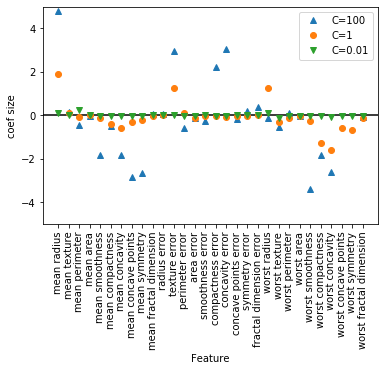

In [41]:
plt.plot(logreg100.coef_.T,'^',label='C=100')
plt.plot(logreg.coef_.T,'o',label='C=1')
plt.plot(logreg001.coef_.T,'v',label='C=0.01')
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("Feature")
plt.ylabel("coef size")
plt.legend()

다중클래스 분류

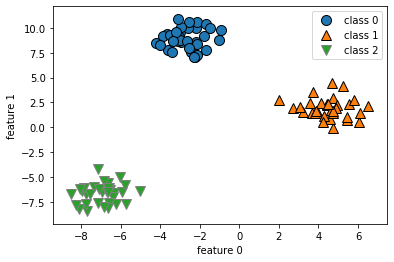

In [66]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0","class 1","class 2"])

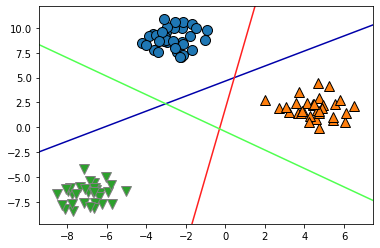

In [76]:
X,y = make_blobs(random_state=42)
linear_svm = LinearSVC().fit(X,y)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
    #print(coef)